## Problem Statement

You work for a fitness company and have gathered data on the fitness activities of 50 individuals using fitness trackers. The dataset is stored in an Excel file named "fitness_data.xlsx" and includes the following columns:

- **name:** Name of the person.
- **steps_taken:** The number of steps taken by individuals.
- **calories_burned:** The estimated calories burned by individuals.
- **sleep_duration(hours):** The number of hours of sleep individuals got on that day.
- **water_intake(ounces):** The amount of water individuals consumed.


**Import Necessary Libraries**

In [1]:
import pandas as pd

## Task1

1. Import the data from the "fitness_data.xlsx" Excel file.
2. Display the first few rows of the dataset to get an overview.
3. Calculate and display basic statistics (mean, median, min, max) for each column.


In [2]:
df = pd.read_excel('fitness_data.xlsx')
df.head()

,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
0,Akshay,10500,4500,7.5,80
1,Priya,9800,4200,7.2,75
2,Raj,11500,4800,7.0,90
3,Emily,12000,5000,7.8,85
4,Rohit,8900,4000,7.0,70


In [3]:
df.describe()

,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
count,50.000000,50.000000,50.000000,50.000000
mean,10316.000000,4418.000000,7.396000,79.600000
std,1177.052701,370.708092,1.660951,14.457538
min,8000.000000,3700.000000,4.000000,30.000000
25%,9625.000000,4200.000000,7.000000,70.000000
50%,10250.000000,4400.000000,7.200000,80.000000
75%,11000.000000,4700.000000,7.500000,90.000000
max,15000.000000,5500.000000,18.000000,100.000000


## Task2:  Range and IQR

1. Calculate the range of "steps_taken".
2. Calculate the range of "calories_burned".
3. Calculate the Interquartile Range (IQR) for "sleep_duration(hours)".
4. Calculate the IQR for "water_intake(ounces)".

In [6]:
# Calculate the range of "steps_taken" for the entire week

rangest = df.steps_taken.max() - df.steps_taken.min()
# Calculate the range of "calories_burned" for the entire week
rangecb = df.calories_burned.max() - df.calories_burned.min()

# Calculate the Interquartile Range (IQR) for "sleep_duration(hours)"
sleep = df['sleep_duration(hours)'].quantile(0.75) - df['sleep_duration(hours)'].quantile(0.25)

# Calculate the IQR for "water_intake(ounces)"
water = df['water_intake(ounces)'].quantile(0.75) - df['water_intake(ounces)'].quantile(0.25)


# Print the results
rangest, rangecb, sleep, water

(7000, 1800, 0.5, 20.0)

## Task3: Box Plot for Steps Taken

- Create a box plot for the "steps_taken" column to visualize the distribution of daily steps taken by individuals. Interpret the box plot and identify any outliers.

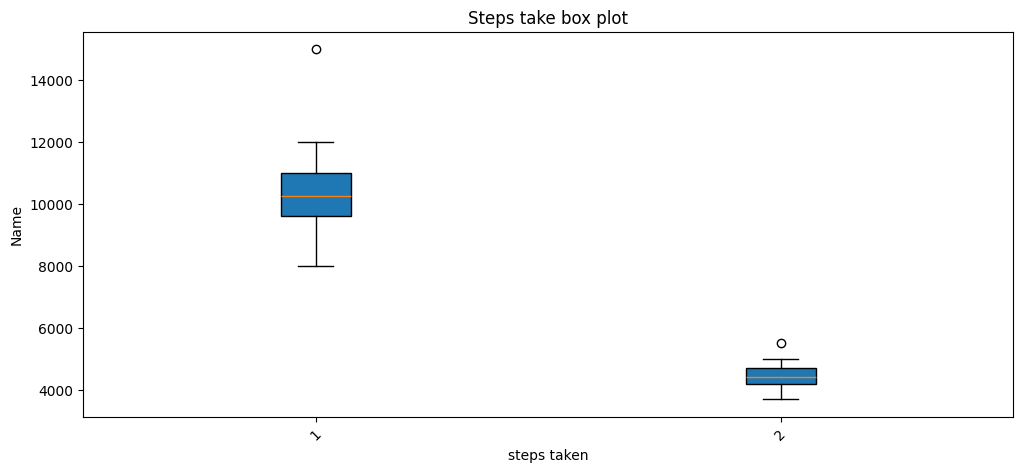

In [17]:


# Set the figure size
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))

# Create a box plot for "Steps Taken"
plt.boxplot(df[ ['steps_taken','calories_burned']],  vert=True, patch_artist=True)

# Set the title and labels
plt.title('Steps take box plot')
plt.xlabel('steps taken')
plt.ylabel('Name')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()
# Ensure proper layout and display the plot


#### Observations

- Most individuals appear to have a median daily step count around 10,000 as indicated by the orange line within the box.
- The presence of an outlier at 15,000 indicates that there is at least one individual who took an exceptionally high number of steps. This could be due to various reasons, such as an unusually active day or a measurement error.


## Task4: 

- Use the IQR method to identify and label outliers in the "sleep_duration(hours)" column.

In [18]:
#defininig the function

def getLowerUpper( data ):
    q1, q3 = data['sleep_duration(hours)'].quantile([0.25,0.75])
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3 +1.5*iqr
    return lower, upper

In [19]:
#get the lower and upper limits
l, u = getLowerUpper(df)

In [23]:
# Identify and label outliers

df[(df['sleep_duration(hours)']>u)|(df['sleep_duration(hours)']<l)]

# Display the outliers


,name,steps_taken,calories_burned,sleep_duration(hours),water_intake(ounces)
21,Elena,11700,4900,18.0,100
30,Siddharth,11300,4700,4.0,75


In [28]:
newdf = df[(df['sleep_duration(hours)']<u)&(df['sleep_duration(hours)']>l)]

In [25]:


# Set the figure size
import matplotlib.pyplot as plt
def plotBox(data):
    plt.figure(figsize = (12,5))

    # Create a box plot for "Steps Taken"
    plt.boxplot(data,  vert=True, patch_artist=True)

    # Set the title and labels
    plt.title('Steps take box plot')
    plt.xlabel('steps taken')
    plt.ylabel('Name')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.show()
# Ensure proper layout and display the plot


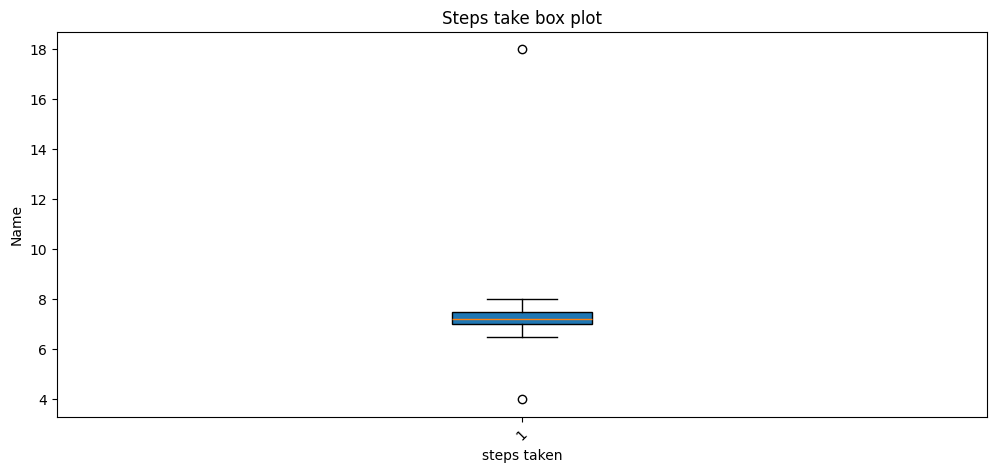

In [26]:
plotBox(df[['sleep_duration(hours)']])

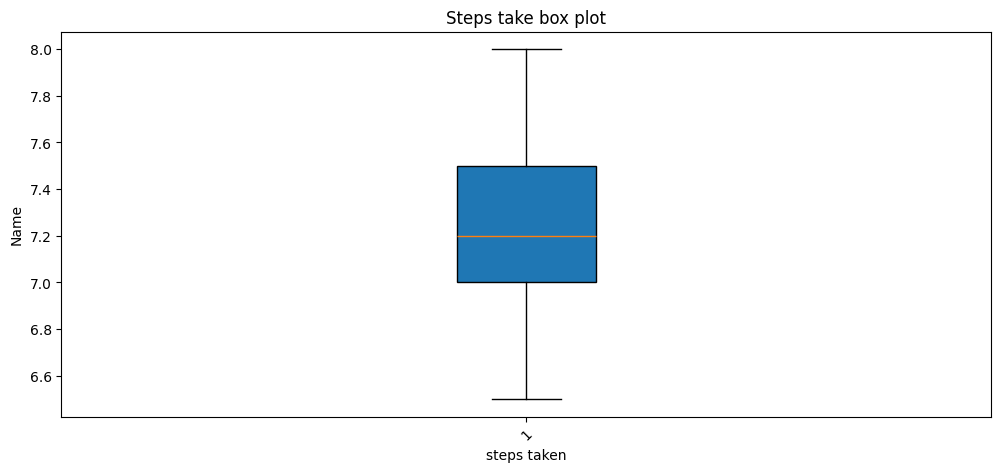

In [30]:
plotBox(newdf['sleep_duration(hours)'])